# DATA608 - Story 4

## Prompt:
I have introduced the term "Data Practitioner" as a generic job descriptor because we have so many different job role titles for individuals whose work activities overlap including Data Scientist, Data Engineer, Data Analyst, Business Analyst, Data Architect, etc.

For this story we will answer the question, "How much do we get paid?" Your analysis and data visualizations must address the variation in average salary based on role descriptor and state.

### Notes:

- You will need to identify reliable sources for salary data and assemble the data sets that you will need.

- Your visualization(s) must show the most salient information (variation in average salary by role and by state).

- For this Story you must use a code library and code that you have written in R, Python or Java Script (additional coding in other languages is allowed).

- Post generation enhancements to you generated visualization will be allowed (e.g. Addition of kickers and labels).

# Introduction

For the purposes of this assignment, I decided to work with a Kaggle dataset which can be found here: https://www.kaggle.com/datasets/arnabchaki/data-science-salaries-2023. This dataset sources data from https://ai-jobs.net/salaries/ and adds a category which is not already there. This data was collected to include various data practitioner positions and their average salaries in 2023. On ai-jobs.net, this dataset is updated on a weekly basis, however since this year has not yet come to an end, I decided to work with the 2023 data to look at these careers over the course of a complete year's average. This dataset contains 11 columns: 'work_year' for the year, 'experience_level' for the experience evel, 'employment_type' for full-time or part-time employment, 'job_title' which includes a variety of data scince positions, 'salary', 'salary_currency', 'salaryinusd' which converts the salary to USD if it is not already, 'employee_residence' for the employee's primary country of residence, 'remote_ratio' for the ratio of remote work, 'company_location', and 'company_size' for the median number of people that worked for the company during that year.

# Installing Packages

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.mode.chained_assignment = None  # default='warn'

# Loading Dataset

In [59]:
url = 'https://raw.githubusercontent.com/rkasa01/DATA608_STORY4/main/ds_salaries.csv'

salarydata = pd.read_csv(url)
print(salarydata.head())

   work_year experience_level employment_type                 job_title  \
0       2023               SE              FT  Principal Data Scientist   
1       2023               MI              CT               ML Engineer   
2       2023               MI              CT               ML Engineer   
3       2023               SE              FT            Data Scientist   
4       2023               SE              FT            Data Scientist   

   salary salary_currency  salary_in_usd employee_residence  remote_ratio  \
0   80000             EUR          85847                 ES           100   
1   30000             USD          30000                 US           100   
2   25500             USD          25500                 US           100   
3  175000             USD         175000                 CA           100   
4  120000             USD         120000                 CA           100   

  company_location company_size  
0               ES            L  
1               US

Here, we can see that this dataframe contains information about data science-related job positions, such as the year of work, experience level, employment type, and more. From here, we can work to clean the data further and move on to make visuals.

# Missing Data

In [60]:
missing_data = salarydata.isnull().sum()
print(missing_data)

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64


We can see that there is no missing data for any of the columns. Because of that, I will not be removing or imputing any data.

# Data Wrangling

In [61]:
salarydata.drop(['work_year', 'salary_currency'], axis=1, inplace=True)
salarydata = salarydata[salarydata['employment_type'] == 'FT']
salarydata = salarydata[salarydata['company_location'] == 'US']
print(salarydata.head())

   experience_level employment_type          job_title  salary  salary_in_usd  \
5                SE              FT  Applied Scientist  222200         222200   
6                SE              FT  Applied Scientist  136000         136000   
9                SE              FT     Data Scientist  147100         147100   
10               SE              FT     Data Scientist   90700          90700   
11               SE              FT       Data Analyst  130000         130000   

   employee_residence  remote_ratio company_location company_size  
5                  US             0               US            L  
6                  US             0               US            L  
9                  US             0               US            M  
10                 US             0               US            M  
11                 US           100               US            M  


I removed the 'work_year' column seeing as this is all from 2023. I also removed the 'salary_currency' column to make sure that we are looking at the data in USD, which will make it easier to compare across the different positions. Additionally, since we are looking at salaries, I wanted the 'salary' to be annual and only included rows which were labeled as "FT" or full-time, and 'company_location' to "US", this way, the data is accurately reflective of data practitioner positions in the United States.

In [62]:
salarydata.drop(['employment_type', 'remote_ratio','company_location','company_size', 'employee_residence'], axis=1, inplace=True)
print(salarydata.head())

   experience_level          job_title  salary  salary_in_usd
5                SE  Applied Scientist  222200         222200
6                SE  Applied Scientist  136000         136000
9                SE     Data Scientist  147100         147100
10               SE     Data Scientist   90700          90700
11               SE       Data Analyst  130000         130000


Since all the jobs are now full-time, I removed the 'employment_type' variable. I also did not find the 'remote_ratio', 'employee_residence', 'company_location', and 'company_size' to be immediately relevant to the question: "How much do we get paid?". However, these are certainly factors which I am interested in analyzing and will do so throughout this assignment.

# Job Titles

In [63]:
job_titles = sorted(salarydata['job_title'].unique())
for title in job_titles:
    print(title)

AI Developer
AI Scientist
Analytics Engineer
Applied Data Scientist
Applied Machine Learning Engineer
Applied Machine Learning Scientist
Applied Scientist
BI Analyst
BI Data Analyst
BI Data Engineer
BI Developer
Big Data Engineer
Business Data Analyst
Business Intelligence Engineer
Cloud Data Architect
Cloud Data Engineer
Cloud Database Engineer
Computer Vision Engineer
Computer Vision Software Engineer
Data Analyst
Data Analytics Consultant
Data Analytics Engineer
Data Analytics Lead
Data Analytics Manager
Data Analytics Specialist
Data Architect
Data Engineer
Data Infrastructure Engineer
Data Lead
Data Manager
Data Modeler
Data Operations Analyst
Data Operations Engineer
Data Quality Analyst
Data Science Consultant
Data Science Engineer
Data Science Lead
Data Science Manager
Data Science Tech Lead
Data Scientist
Data Scientist Lead
Data Specialist
Deep Learning Engineer
Director of Data Science
ETL Developer
Financial Data Analyst
Head of Data
Head of Data Science
Lead Data Analyst
L

As was previously mentioned, this dataset features a number of data practitioner positions. Above, I have displayed all the names in this dataset.

## Categorizing by Experience Level

In [64]:
experience_level = sorted(salarydata['experience_level'].unique())
for title in experience_level:
    print(title)

EN
EX
MI
SE


Because there are so many different job titles, I decided to group positions with the same 'experience_level' together. For example, Data Analytics Manager should be compared with other managerial positions as opposed to a Data Analytics Consultant, which should be compared with other consultants. There are 4 experience levels: EN (entry-level), EX (executive-level), MI (mid-level), and SE (senior-level).

In [65]:
entry_level_df = salarydata[salarydata['experience_level'] == 'EN']
missing_dataEN = entry_level_df.isnull().sum()
print(missing_dataEN)

mid_level_df = salarydata[salarydata['experience_level'] == 'MI']
missing_dataMI = mid_level_df.isnull().sum()
print(missing_dataMI)

senior_level_df = salarydata[salarydata['experience_level'] == 'SE']
missing_dataSE = senior_level_df.isnull().sum()
print(missing_dataSE)

executive_level_df = salarydata[salarydata['experience_level'] == 'EX']
missing_dataEX = senior_level_df.isnull().sum()
print(missing_dataEX)

experience_level    0
job_title           0
salary              0
salary_in_usd       0
dtype: int64
experience_level    0
job_title           0
salary              0
salary_in_usd       0
dtype: int64
experience_level    0
job_title           0
salary              0
salary_in_usd       0
dtype: int64
experience_level    0
job_title           0
salary              0
salary_in_usd       0
dtype: int64


I found that there was no missing data.  
I started by making dataframes for each experience level by subgrouping:

In [66]:
entry_level_df.drop(['experience_level', 'salary'], axis=1, inplace=True)
print(entry_level_df.head())

                    job_title  salary_in_usd
13          Applied Scientist         213660
14          Applied Scientist         130760
42          Applied Scientist         204620
43          Applied Scientist         110680
95  Machine Learning Engineer         163196


In [67]:
mid_level_df.drop(['experience_level', 'salary'], axis=1, inplace=True)
print(mid_level_df.head())

        job_title  salary_in_usd
19   Data Analyst         150000
20   Data Analyst         110000
35  Data Engineer         162500
36  Data Engineer         130000
37   Data Analyst         105380


In [68]:
senior_level_df.drop(['experience_level', 'salary'], axis=1, inplace=True)
print(senior_level_df.head())

            job_title  salary_in_usd
5   Applied Scientist         222200
6   Applied Scientist         136000
9      Data Scientist         147100
10     Data Scientist          90700
11       Data Analyst         130000


In [69]:
executive_level_df.drop(['experience_level', 'salary'], axis=1, inplace=True)
print(executive_level_df.head())

          job_title  salary_in_usd
58   Data Scientist         258750
59   Data Scientist         185000
203   Data Engineer         220000
204   Data Engineer         205000
228    Head of Data         329500


# Summary Statistics

## Weighted Averages

- Because there are several positions with the same job title and experience level, I decided to calculate the weighted average and impute those values for those positions, every time there is a co-occurance.

### Entry-Level Experience

In [70]:
job_title_counts = entry_level_df['job_title'].value_counts() #co-occurance
duplicate_job_titles = job_title_counts[job_title_counts > 1].index
for job_title in duplicate_job_titles:
    mask = entry_level_df['job_title'] == job_title
    weighted_avg_salary = entry_level_df.loc[mask, 'salary_in_usd'].mean()
    entry_level_df.loc[mask, 'salary_in_usd'] = weighted_avg_salary

entry_level_df.drop_duplicates(subset='job_title', keep='first', inplace=True)
entry_level_df['salary_in_usd'] = entry_level_df['salary_in_usd'].round(2)#keep 2 after decimal

print(entry_level_df.head())

                     job_title  salary_in_usd
13           Applied Scientist      167356.67
95   Machine Learning Engineer      139916.45
113         Research Scientist      140000.00
137              Data Engineer      109806.12
141               Data Analyst       70847.73


In [71]:
round(entry_level_df.describe(),2)

,salary_in_usd
count,25.00
mean,109294.30
std,46179.02
min,48000.00
25%,70000.00
50%,105000.00
75%,139916.45
max,225000.00


### Mid-Level Experience

In [72]:
job_title_counts = mid_level_df['job_title'].value_counts() #co-occurance
duplicate_job_titles = job_title_counts[job_title_counts > 1].index

for job_title in duplicate_job_titles:
    mask = mid_level_df['job_title'] == job_title
    weighted_avg_salary = mid_level_df.loc[mask, 'salary_in_usd'].mean()
    mid_level_df.loc[mask, 'salary_in_usd'] = weighted_avg_salary
mid_level_df.drop_duplicates(subset='job_title', keep='first', inplace=True)
mid_level_df['salary_in_usd'] = mid_level_df['salary_in_usd'].round(2)#keep 2 after decimal

print(mid_level_df.head())

                     job_title  salary_in_usd
19                Data Analyst      112169.92
35               Data Engineer      125707.76
129     Data Analytics Manager      147500.00
155      Business Data Analyst      121250.00
190  Machine Learning Engineer      161837.57


In [73]:
round(mid_level_df.describe(),2)

,salary_in_usd
count,38.00
mean,133462.67
std,33979.15
min,56000.00
25%,114708.33
50%,128262.50
75%,156970.00
max,200000.00


### Senior-Level Experience

In [74]:
job_title_counts = senior_level_df['job_title'].value_counts() #co-occurance
duplicate_job_titles = job_title_counts[job_title_counts > 1].index

for job_title in duplicate_job_titles:
    mask = senior_level_df['job_title'] == job_title
    weighted_avg_salary = senior_level_df.loc[mask, 'salary_in_usd'].mean()
    senior_level_df.loc[mask, 'salary_in_usd'] = weighted_avg_salary
senior_level_df.drop_duplicates(subset='job_title', keep='first', inplace=True)
senior_level_df['salary_in_usd'] = senior_level_df['salary_in_usd'].round(2)#keep 2 after decimal


print(senior_level_df.head())

                         job_title  salary_in_usd
5                Applied Scientist      192907.69
9                   Data Scientist      165281.35
11                    Data Analyst      124618.09
15                    Data Modeler      118900.00
25  Business Intelligence Engineer      174150.00


In [75]:
round(senior_level_df.describe(),2)

,salary_in_usd
count,52.00
mean,174702.98
std,59943.19
min,82863.33
25%,131829.54
50%,172075.00
75%,193428.01
max,405000.00


### Executive-Level Experience

In [76]:
job_title_counts = executive_level_df['job_title'].value_counts() #co-occurance
duplicate_job_titles = job_title_counts[job_title_counts > 1].index

for job_title in duplicate_job_titles:
    mask = executive_level_df['job_title'] == job_title
    weighted_avg_salary = executive_level_df.loc[mask, 'salary_in_usd'].mean()
    executive_level_df.loc[mask, 'salary_in_usd'] = weighted_avg_salary
executive_level_df.drop_duplicates(subset='job_title', keep='first', inplace=True)
executive_level_df['salary_in_usd'] = executive_level_df['salary_in_usd'].round(2)#keep 2 after decimal

print(executive_level_df.head())

              job_title  salary_in_usd
58       Data Scientist      180645.83
203       Data Engineer      212522.72
228        Head of Data      239820.00
296  Analytics Engineer      175125.00
411      Data Architect      167500.00


In [77]:
round(executive_level_df.describe(),2)

,salary_in_usd
count,13.00
mean,193310.18
std,45297.66
min,120000.00
25%,167500.00
50%,190000.00
75%,212522.72
max,294375.00


# Data Visualization

## Entry-Level Experience

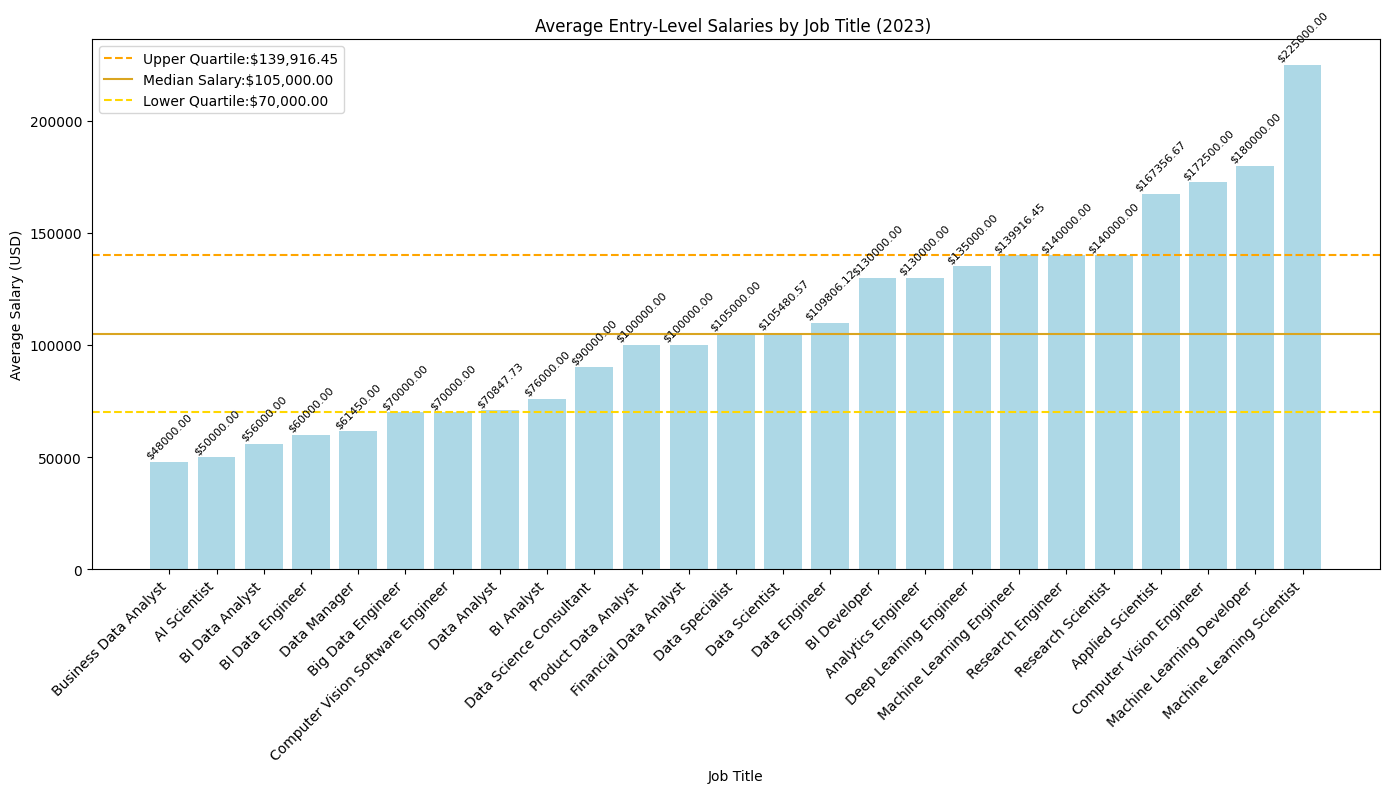

In [78]:
median_salary = entry_level_df['salary_in_usd'].median()
lower_q = entry_level_df['salary_in_usd'].quantile(0.25)
upper_q = entry_level_df['salary_in_usd'].quantile(0.75)


job_title_salaries = entry_level_df.groupby('job_title')['salary_in_usd'].mean()

plt.figure(figsize=(14, 8))
job_title_salaries_sorted = job_title_salaries.sort_values()
plt.bar(job_title_salaries_sorted.index, job_title_salaries_sorted.values, color='lightblue')


plt.xlabel('Job Title')
plt.ylabel('Average Salary (USD)')
plt.title('Average Entry-Level Salaries by Job Title (2023) ')

plt.axhline(y=upper_q, color='orange', linestyle='--', label='Upper Quartile:$139,916.45')
plt.axhline(y=median_salary, color='goldenrod', linestyle='-', label='Median Salary:$105,000.00')
plt.axhline(y=lower_q, color='gold', linestyle='--', label='Lower Quartile:$70,000.00')
plt.legend()

plt.xticks(rotation=45, ha='right')

for i, value in enumerate(job_title_salaries_sorted.values):
    plt.text(i, value + 500, f'${value:.2f}', ha='center', va='bottom', rotation=45, fontsize=8)


plt.tight_layout()
plt.show()

# Mid-Level Experience

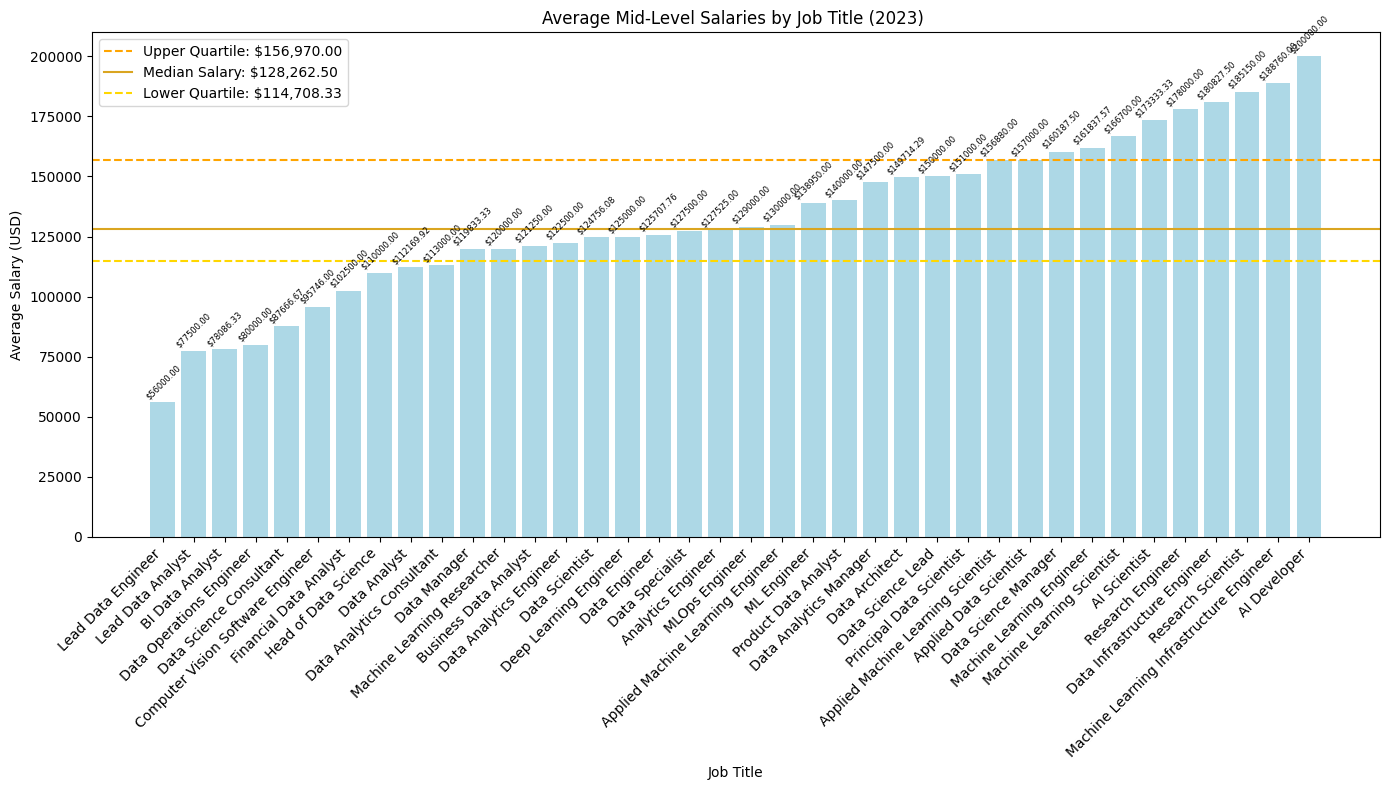

In [79]:
job_title_salaries = mid_level_df.groupby('job_title')['salary_in_usd'].mean()

plt.figure(figsize=(14, 8))
job_title_salaries_sorted = job_title_salaries.sort_values()
plt.bar(job_title_salaries_sorted.index, job_title_salaries_sorted.values, color='lightblue')


plt.xlabel('Job Title')
plt.ylabel('Average Salary (USD)')
plt.title('Average Mid-Level Salaries by Job Title (2023) ')

median_salary = mid_level_df['salary_in_usd'].median()
lower_q = mid_level_df['salary_in_usd'].quantile(0.25)
upper_q = mid_level_df['salary_in_usd'].quantile(0.75)

plt.axhline(y=upper_q, color='orange', linestyle='--', label='Upper Quartile: $156,970.00')
plt.axhline(y=median_salary, color='goldenrod', linestyle='-', label='Median Salary: $128,262.50')
plt.axhline(y=lower_q, color='gold', linestyle='--', label='Lower Quartile: $114,708.33')

plt.legend()

plt.xticks(rotation=45, ha='right')

for i, value in enumerate(job_title_salaries_sorted.values):
    plt.text(i, value + 500, f'${value:.2f}', ha='center', va='bottom', rotation=45, fontsize=6)


plt.tight_layout()
plt.show()

# Senior-Level Experience

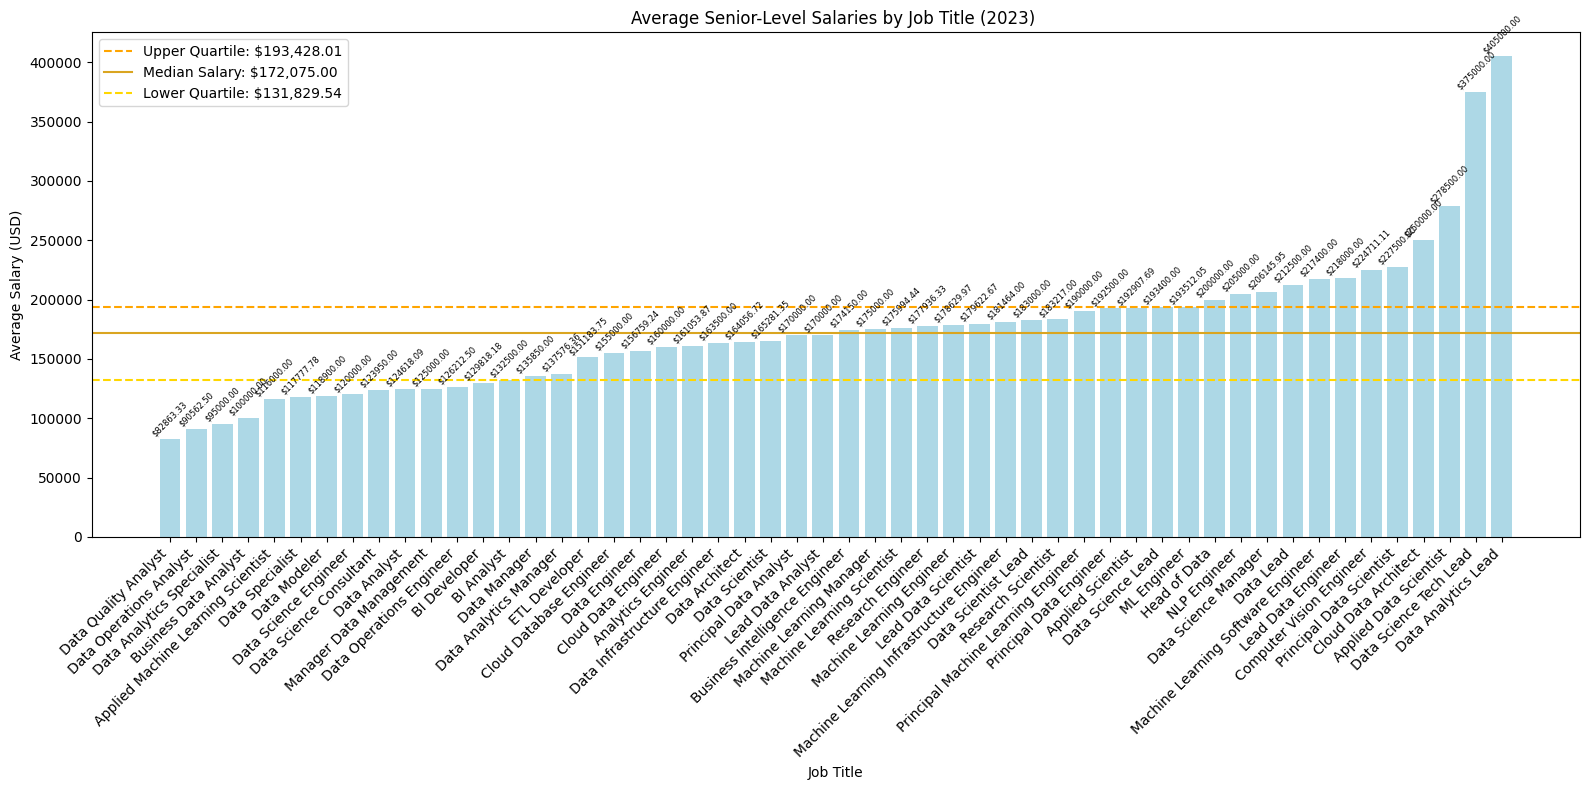

In [80]:
job_title_salaries = senior_level_df.groupby('job_title')['salary_in_usd'].mean()

plt.figure(figsize=(16, 8))
job_title_salaries_sorted = job_title_salaries.sort_values()
plt.bar(job_title_salaries_sorted.index, job_title_salaries_sorted.values, color='lightblue')


plt.xlabel('Job Title')
plt.ylabel('Average Salary (USD)')
plt.title('Average Senior-Level Salaries by Job Title (2023) ')

median_salary = senior_level_df['salary_in_usd'].median()
lower_q = senior_level_df['salary_in_usd'].quantile(0.25)
upper_q = senior_level_df['salary_in_usd'].quantile(0.75)

plt.axhline(y=upper_q, color='orange', linestyle='--', label='Upper Quartile: $193,428.01')
plt.axhline(y=median_salary, color='goldenrod', linestyle='-', label='Median Salary: $172,075.00')
plt.axhline(y=lower_q, color='gold', linestyle='--', label='Lower Quartile: $131,829.54')

plt.legend()

plt.xticks(rotation=45, ha='right')

for i, value in enumerate(job_title_salaries_sorted.values):
    plt.text(i, value + 500, f'${value:.2f}', ha='center', va='bottom', rotation=45, fontsize=6)


plt.tight_layout()
plt.show()

# Executive-Level Experience

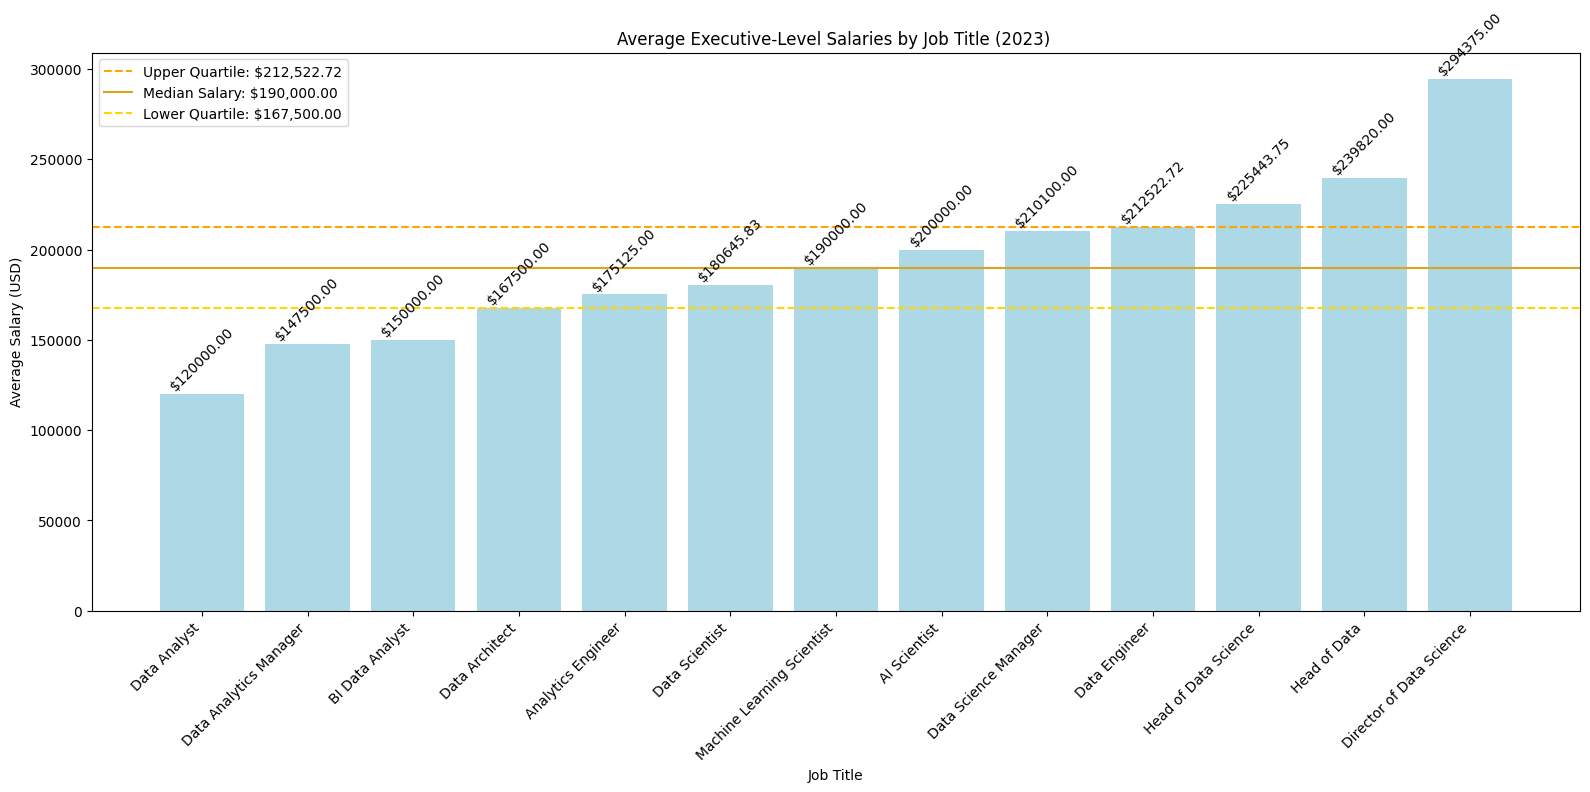

In [81]:
job_title_salaries = executive_level_df.groupby('job_title')['salary_in_usd'].mean()

plt.figure(figsize=(16, 8))
job_title_salaries_sorted = job_title_salaries.sort_values()
plt.bar(job_title_salaries_sorted.index, job_title_salaries_sorted.values, color='lightblue')


plt.xlabel('Job Title')
plt.ylabel('Average Salary (USD)')
plt.title('Average Executive-Level Salaries by Job Title (2023) ')

median_salary = executive_level_df['salary_in_usd'].median()
lower_q = executive_level_df['salary_in_usd'].quantile(0.25)
upper_q = executive_level_df['salary_in_usd'].quantile(0.75)

plt.axhline(y=upper_q, color='orange', linestyle='--', label='Upper Quartile: $212,522.72')
plt.axhline(y=median_salary, color='goldenrod', linestyle='-', label='Median Salary: $190,000.00')
plt.axhline(y=lower_q, color='gold', linestyle='--', label='Lower Quartile: $167,500.00')
plt.legend()

plt.xticks(rotation=45, ha='right')

for i, value in enumerate(job_title_salaries_sorted.values):
    plt.text(i, value + 500, f'${value:.2f}', ha='center', va='bottom', rotation=45, fontsize=10)


plt.tight_layout()
plt.show()

# Conclusion

This assignment displays how much we get paid across varying levels of experience. There are certainly other factors which can impact salary, such as the type of employment, the company size, the remote to in-office ratio, the location of both the employee and employer, and many more. With this assignment, I aimed to show how much we get paid working full-time in the US as US-residing employees. I decided that company size and remote ratio were not relevant to answering the question. Because there were several positions with the same job title, I looked at the weighted averages of each one that had a co-occurance. In the future, I would like to look at this data across states since salaries vary largely within the nation, and compare those with the different levels of experience as well. For the purposes of this assignment however, I wanted to look at the average salaries in the country.